# Project Assignment B 

## 1. Motivation

### What is your dataset?

For the project, we are using the Melbourne housing data set which contains information about the housing market in Melbourne from 2016-2018. The dataset is 5Mb large and originally it consisted of 21 attributes and 34857 observations. 

### Description of the attributes
Suburb: The suburbs in Melbourne.<br>
Address: The adress of each property in the data set.<br>
Rooms: Total number of rooms in each property.<br>
Type: Type of property (H=House, U=Unit, T=Townhouse).<br>
Price: Sold Price of each propery in AUD.<br>
Method: Method sold of each property (S - property sold, SP - property sold prior, PI - property passed in, PN - sold prior not disclosed, SN - sold not disclosed, NB - no bid, VB - vendor bid, W - withdrawn prior to auction, SA - sold after auction, SS - sold after auction price not disclosed).<br>
SellerG: The name of the seller.<br>
Date: The date each property was sold (2016-2018).<br>
Distance: Distance from central business district (CBD) in Kilometers.<br>
Postcode: The post code of the property.<br>
Bedroom2: Number of bedrooms in the property.<br> 
Bathroom: Numberof bathrooms in the property.<br>
Car: Number of carspots in the property.<br>
Landsize: Landsize in square meters.<br>
BuildingArea: Building Size in square meters.<br>
YearBuilt: Year where the property was built.<br>
CouncilArea: Governing council for the area.<br>
Lattitude: Lattitude of the property.<br>
Longtitude: Longtitude of the property.<br>
Regionname: Region where the property belongs.<br>
Propertycount: Number of properties in each suburb.<br>

### Why did you choose this particular dataset?

The reason for selecting this data set is to examine what drives the house prices in Melbourne, what are the parameters that affect the price, and weather the housing market is in a bubble. With the available data, we can use advanced analytics to predict house prices and make it possible to review patterns to understand whether the property is a good investment and a great match to potential customer. 

### What was your goal for the end user's experience?

The primary goal for the end user is to make informed decisions to buying a house or selling a house while keeping in mind important factors such as surrounding entities, distance from business districts various regions etc. The value of this analytics project is for people to reduce risk of buying and selling and predicting changes in home value for potential buyers. The ultimate goal, is to gain insights on the housing market trends that can also be applicable to the housing market in Copenhagen. As a citizen in Copenhagen for a few years, I have realized increasing rental prices each year. When I am to make a decision to buy a house, I want to know whether it is the right moment or not and where the right place is. In the Melbourne housing data set, we would also like to examine if there are specific regions where prices are increasing over time and regions where prices are declining. Increasing prices per region might suggest that it is a developing area which can potentially be a good investment. 

In [1]:
import pandas as pd
import numpy as np
import csv
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
d = pd.read_csv('MEL2.csv')
#number of rows and columns
r,c = d.shape
print('The original dataset has', r,'rows and',c,'columns')
names=list(d.columns)

The original dataset has 34857 rows and 21 columns


## 2. Basic Stats

### Choices in data cleaning and pre processing

In [3]:
#count missing values in each column
miss_values = d.isnull().sum()
#count columns with missing values
Miss_cols = (miss_values!=0).sum()
#number of rows with missing values
Miss_rows =d.isnull().any(axis=1).sum()
print('The missing values in each column are:\n',miss_values)

print('There are', Miss_cols,'columns with missing values and',Miss_rows,'rows with missing values.')

The missing values in each column are:
 Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64
There are 14 columns with missing values and 25970 rows with missing values.


Below is a visual inspection of the locations in the dataframe where there are missing values.

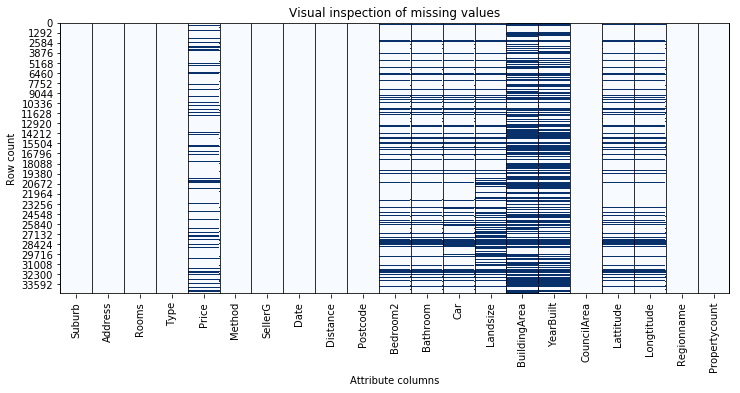

In [4]:
fig, ax = plt.subplots(figsize=(12,5))  
sns.heatmap(d.isnull(), ax=ax, cbar=False, cmap="Blues")
ax.vlines(range(c), *ax.get_ylim(),linewidths=0.8,color='black')
ax.axhline(y=0, color='k',linewidth=0.8)
ax.axhline(y=(r-150), color='k',linewidth=0.8)
ax.axvline(x=0, color='k',linewidth=0.8)
ax.axvline(x=c, color='k',linewidth=2)
plt.title('Visual inspection of missing values')
plt.xlabel('Attribute columns')
plt.ylabel('Row count')
plt.show()

There are several ways of how to handle th missing values. 1) Delete all the columns that contain missing values. 2) Delete all the rows that contain missing values. 3) Delete the columns 'BuildingArea' and 'Year built' where the most missing values are and then remove the rows that contain the missing values. 4) Impute the missing values with the median/mean. 5) Predict the missing values using machine learning algorithms. We decided to exclude options 1 and 3 since we will probably miss important information that drives the prices of the houses. We also decided to exclude options 4 and 5 because it will probably lead to innacurate results  by imputing that large number of missing values. The only option left is remove all the rows with missing values.

In [5]:
#Removing all the rows with missing values
d = d.dropna().reset_index(drop=True)

In the dataframe, there are also some columns that we do not find any use for them in our analysis, so we will delete them as well. Those are the 'Adress', 'SellerG', 'Postcode', 'Propertycount'.

In [6]:
#Dropping unnecessary columns
d = d.drop(["Address", "SellerG",'Postcode','Propertycount'], axis=1)

We would also like to investigate if there are any outliers and remove them from the analysis as well. We will create box plots to visualize cases with extreme outliers. For that reason we pick only the columns with numerical variables

In [7]:
#Selecting columns for outlier detection
k = ['Rooms','Price','Distance','Bathroom','Car','BuildingArea','YearBuilt','Landsize']

In [8]:
#Creating a data frame with only the attributes for outlier detection
Outlier = d[k]

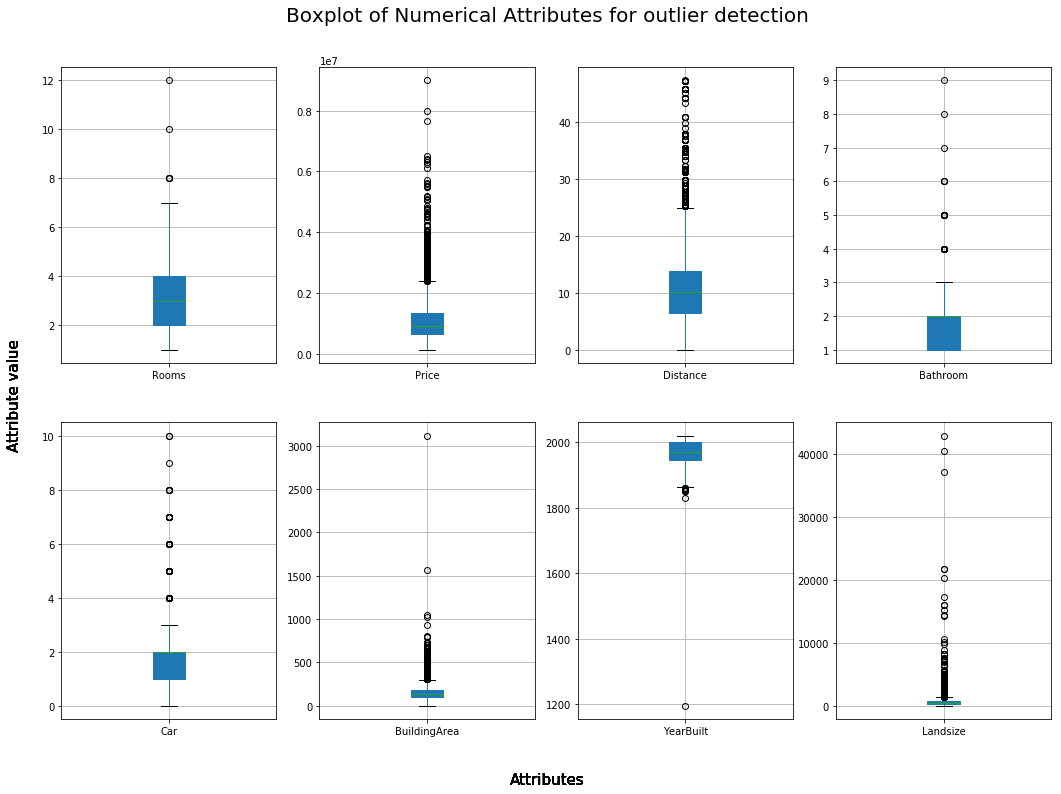

In [9]:
fig, axes = plt.subplots(2,4,figsize=(10,12))
for i,el in enumerate(list(Outlier.columns.values)):
    a = Outlier.boxplot(el, patch_artist=True, ax=axes.flatten()[i]) 
    fig.text(0.8, 0.05, 'Attributes', ha='center', fontsize=15)
    fig.text(0.05, 0.5, 'Attribute value', va='center', rotation='vertical', fontsize=15)
plt.subplots_adjust(right=1.5) 
plt.suptitle('Boxplot of Numerical Attributes for outlier detection', x=0.8 , y=0.95, fontsize=20)
plt.show()

From the above box plots, the are some values I wish to remove as they seem to be extreme outliers. That being noted, I will remove the rows with value on 'BuildingArea' that are bigger than 1500, rows on YearBuilt that are smaller than 1800 and rows on building area that are larger than 2000. On top of that, we made the assumption that no house exist that is smaller than 25 square meters, so we exclude them form the analysis as well. Lastly, we will exclude the properties that have more than six rooms since there are just a handfull of people that can afford that much.

In [10]:
#Building area smaller than 1500
d = d[d.BuildingArea < 1500]
d = d[d.BuildingArea >25]
#YearBuilt larger than 1500
d = d[d.YearBuilt >1800]
d = d[d.YearBuilt <2019]
d =d[d.Landsize <3000] 
d= d[d.Landsize >25]
d= d[d.Rooms <7]

In [11]:
r1,c1=d.shape
print('After cleaning, the dataset has', r1,'rows and',c1,'columns')

After cleaning, the dataset has 7684 rows and 17 columns


### Discussion on data set stats

In [12]:
#Making data a datetime object
d.Date=pd.to_datetime(d.Date)
d['year'],d['month'],d['day'] = d.Date.dt.year, d.Date.dt.month, d.Date.dt.day

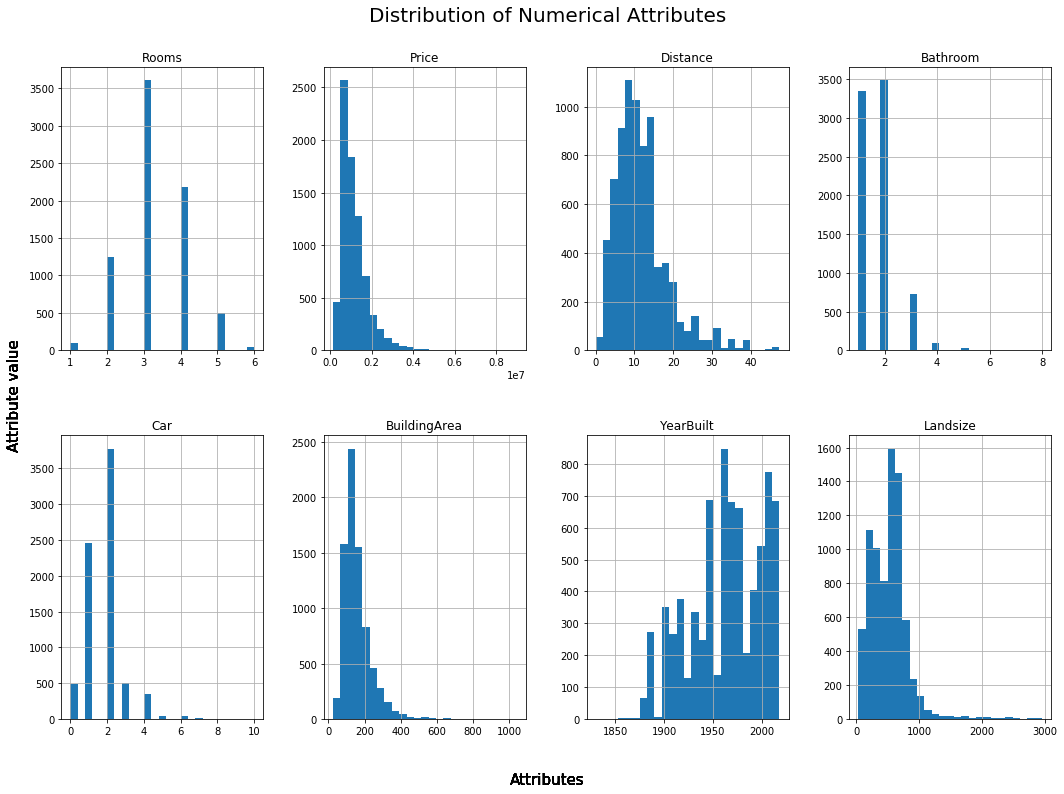

In [13]:
fig, axes = plt.subplots(2,4,figsize=(10,12))
Outlier2 = d[k]
for i,el in enumerate(list(Outlier2.columns.values)):
    a = Outlier2.hist(el,ax=axes.flatten()[i],bins=25) 
    fig.text(0.8, 0.05, 'Attributes', ha='center', fontsize=15)
    fig.text(0.05, 0.5, 'Attribute value', va='center', rotation='vertical', fontsize=15)
    #plt.grid(False)
plt.subplots_adjust(right=1.5)
plt.suptitle('Distribution of Numerical Attributes', x=0.8 , y=0.95, fontsize=20)
plt.show()

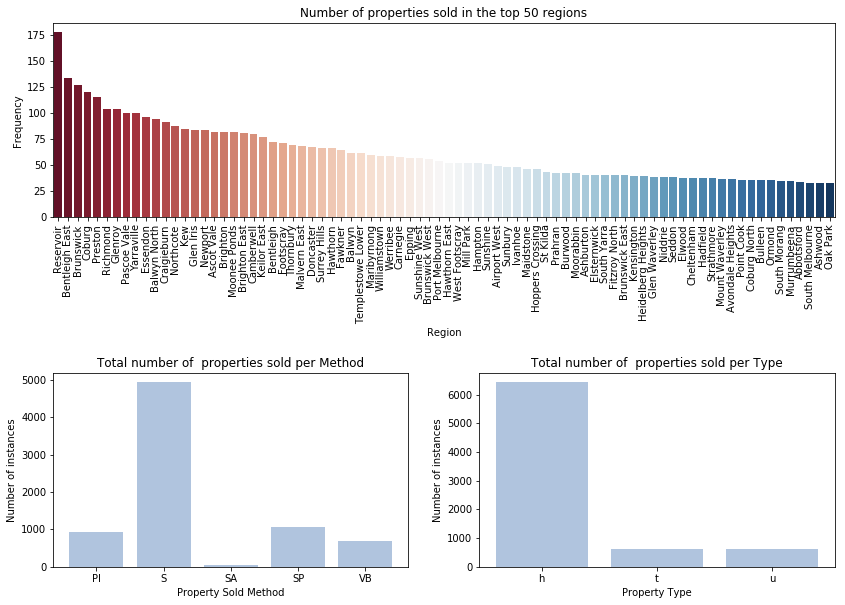

In [14]:
#basic ploting of the categorical variabls 
fig, ax1 = plt.subplots(figsize=(14,10))

ax3 = plt.subplot(211)
p3 = d.Suburb.value_counts().head(80)
ax3 = sns.barplot(x=p3.index,y=p3.values,palette ="RdBu")
#ax3.bar(p3.index,p3.values, color='lightsteelblue')
ax3.set_title('Number of properties sold in the top 50 regions')
ax3.set_xlabel('Region')
ax3.set_ylabel('Frequency')
ax3.tick_params(axis='y')
plt.xticks(rotation=90,size=10)
plt.subplots_adjust(hspace = 0.8) 

ax1 = plt.subplot(224)   
ax1.set_xlabel('Property Type')
ax1.set_ylabel('Number of instances')
ax1.set_title('Total number of  properties sold per Type')
p1=d.groupby(['Type']).size()
ax1.bar(p1.index,p1.values, color='lightsteelblue')
ax1.tick_params(axis='y')

ax2 = plt.subplot(223)
ax2.set_xlabel('Property Sold Method')
ax2.set_ylabel('Number of instances')
ax2.set_title('Total number of  properties sold per Method')
p2=d.groupby(['Method']).size()
ax2.bar(p2.index,p2.values, color='lightsteelblue')
ax2.tick_params(axis='y')



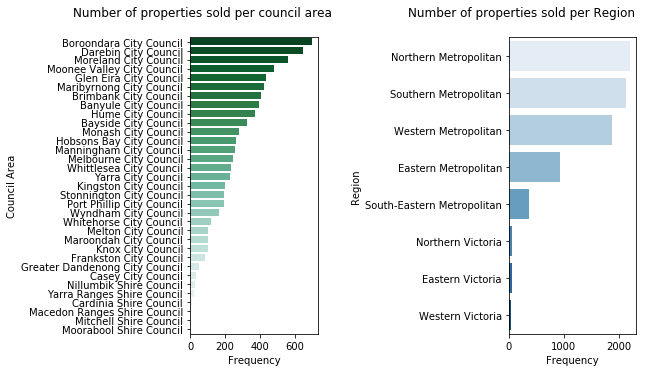

In [15]:
fig, ax = plt.subplots(figsize=(8, 12))

ax = plt.subplot(221)
p4 = d.CouncilArea.value_counts()
ax = sns.barplot(y=p4.index,x=p4.values,palette ="BuGn_r")
ax.set_ylabel('Council Area')
ax.set_title('Number of properties sold per council area')
ax.set_xlabel('Frequency')
ax.title.set_position([.1, 1.05])
plt.subplots_adjust(wspace = 1.5) 

ax2 = plt.subplot(222)
p5 = d.Regionname.value_counts()
ax2.set_ylabel('Region')
ax2.set_title('Number of properties sold per Region')
ax2.set_xlabel('Frequency')
ax2.title.set_position([.1, 1.05])
ax2 = sns.barplot(y=p5.index,x=p5.values,palette ="Blues")

The plots indicates that the distributions in the columns are primarily left skewed. The average price for a property is around 1 million AUD and the majority of the proparties are 0 to 20 Kilometers away from the central business district. The average building area is around 120 square meters and the majority of the land size varies from 100 to 800 square meters. Most of the properties were sold with the S method and most of the properties sold are house types.  The year built of the properties ranges from 1830 to 2018. From the histograms above, We see that the most popular are to buy a house is the Boroondara city cancel area followed by the Darebin city council area. The most popular regions are the Northern Metropolitan, Southern Metropolitan and Western Metropolitan. 

## 3. Data analysis

It is safe to assume that the larger the number of rooms in a property, the more expensive it will be. In order to make a quantitative comparison of how expensive a house is, we are grouping the regions and the number of rooms each property has on each region and then compare prices in every region according to the number of rooms.

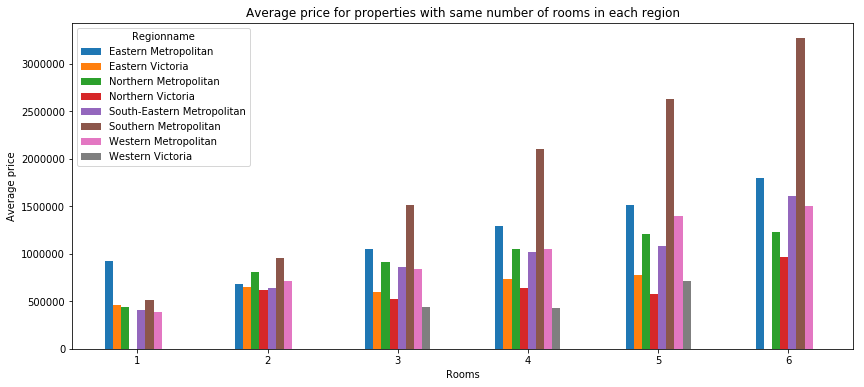

In [16]:
fig, ax = plt.subplots(figsize=(14,6))
d.groupby(['Rooms','Regionname']).mean()['Price'].unstack().plot(kind='bar',ax=ax)
plt.title('Average price for properties with same number of rooms in each region')
plt.xticks(rotation=0,size=10)
plt.ylabel('Average price')
plt.show()

The above figure reveals a trend. For properties have 2 to 6 rooms the most expensive region is the Southern Metropolitan. The cheaper region for properties having 2 to 6 rooms is the Northern Victoria. In the case where the property has just 1 room, the most expensive area is the Eastern Metropolitan followed by the Southern Metropolitan. I would like to examine why properties with one room in Southern Metropolitan are less expensive than properties with one romm in Eastern metropolitan.

In [24]:
d.groupby(['Rooms','Regionname']).mean()['BuildingArea'].unstack()

Regionname,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
Rooms,,,,,,,,
1,103.000000,42.000000,53.571429,NaN,65.000000,60.148837,56.952941,NaN
2,97.136044,81.790000,95.216427,61.000000,103.347826,95.675995,100.813618,NaN
3,142.434229,117.792000,131.836946,138.563529,134.797473,151.069925,140.499919,109.32750
4,205.567164,245.579474,184.086181,194.066000,193.998077,227.828192,192.639543,161.71875
5,272.518500,215.187500,241.819747,190.500000,217.958333,304.499167,255.043902,280.00000
6,277.666667,NaN,269.250000,405.000000,351.333333,315.647059,286.500000,NaN


Apparently, the size of the building area affects the price of the one room properties. Eastern Metropolitan properties for one room apartment has much larger buiding size than the respective Southern Metropolitan and that explains the deviation from the trend from the figure above. According to the above information, we can  derive that most expensive region is the Southern Metropolitan. Followed on that I would like to investigate what drives the expensiveness of each region. So, what will follow the analysis is a plot with the distances of each region from the central business district(CBD).



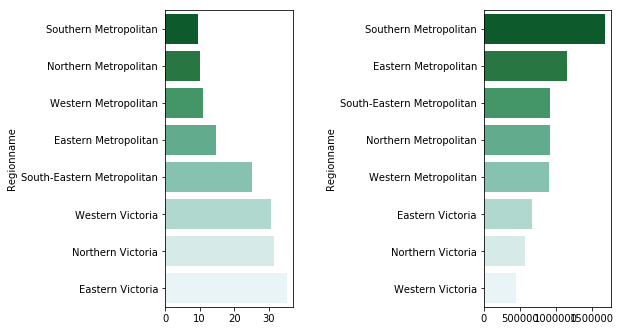

In [62]:
k = d.groupby(['Regionname'])['Distance'].mean().sort_values()
kk = d.groupby(['Regionname'])['Price'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 12),sharey=True)

ax1 = plt.subplot(221)   
ax1 = sns.barplot(y=k.index,x=k.values,palette ="BuGn_r")

ax2 = plt.subplot(222)   
ax2 = sns.barplot(y=kk.index,x=kk.values,palette ="BuGn_r")

plt.subplots_adjust(wspace = 1.5) 

In [64]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x=k.values, y=kk.values,
                     hue=k.index, size="mass",
                     palette=cmap, sizes=(10, 200),
                     data=planets)

NameError: name 'planets' is not defined

In [63]:
k

Regionname
Southern Metropolitan          9.434687
Northern Metropolitan         10.100993
Western Metropolitan          10.905760
Eastern Metropolitan          14.746170
South-Eastern Metropolitan    25.122099
Western Victoria              30.636585
Northern Victoria             31.593103
Eastern Victoria              35.178000
Name: Distance, dtype: float64

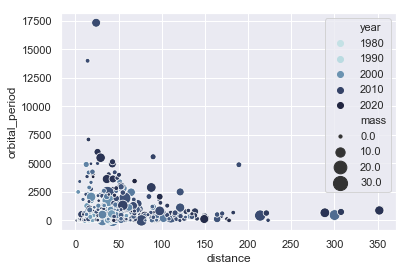

In [65]:
import seaborn as sns
sns.set()

# Load the example iris dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="distance", y="orbital_period",
                     hue="year", size="mass",
                     palette=cmap, sizes=(10, 200),
                     data=planets)

In [66]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100,77.40,2006
1,Radial Velocity,1,874.774000,2.210,56.95,2008
2,Radial Velocity,1,763.000000,2.600,19.84,2011
3,Radial Velocity,1,326.030000,19.400,110.62,2007
4,Radial Velocity,1,516.220000,10.500,119.47,2009
5,Radial Velocity,1,185.840000,4.800,76.39,2008
6,Radial Velocity,1,1773.400000,4.640,18.15,2002
7,Radial Velocity,1,798.500000,NaN,21.41,1996
8,Radial Velocity,1,993.300000,10.300,73.10,2008
9,Radial Velocity,2,452.800000,1.990,74.79,2010
